<a href="https://colab.research.google.com/github/ahnyosep/ai/blob/main/%EB%8D%B0%EC%9D%B4%EC%BD%98_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필수 라이브러리 읽어오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


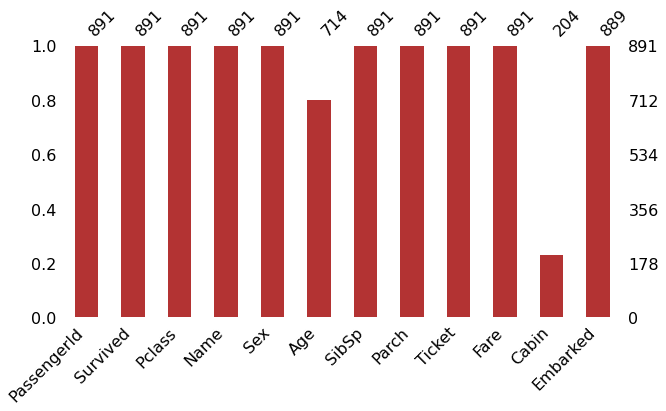

In [ ]:
import missingno as msno 
msno.bar(train, figsize=(10,5), color=(0.7, 0.2, 0.2))
plt.show()

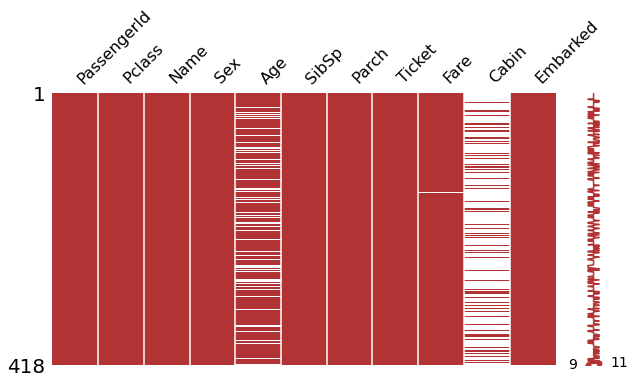

In [ ]:
msno.matrix(test, figsize=(10,5), color=(0.7, 0.2, 0.2))
plt.show()

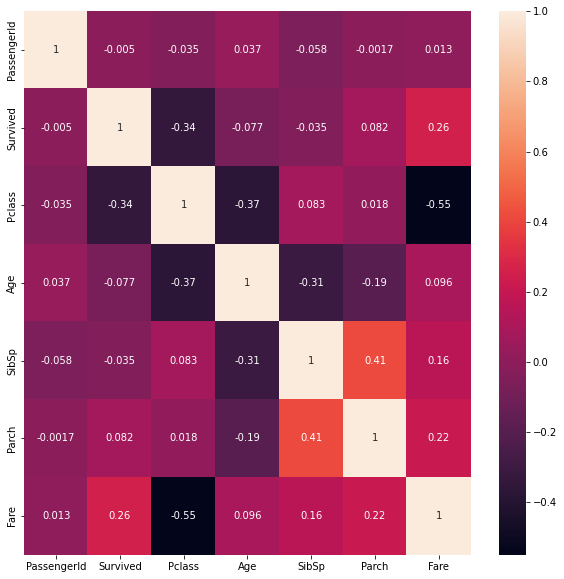

In [ ]:
# 상관 관계 분석 - 숫자로 이루어진 데이터만 가능

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

In [ ]:
# 데이터 결합

train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'

data = pd.concat([train, test], axis=0)
print(data.shape)

(1309, 13)


In [ ]:
# 숫자형 데이터를 가진 열만 추출

data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']]

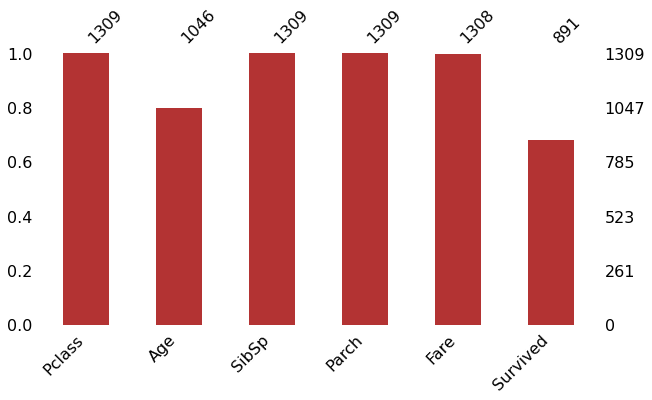

In [ ]:


import missingno as msno 
msno.bar(data_num, figsize=(10,5), color=(0.7, 0.2, 0.2))
plt.show()

In [ ]:
# 결측값 대체

data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())       # 평균으로 대체
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0]) # 빈도수로 대체

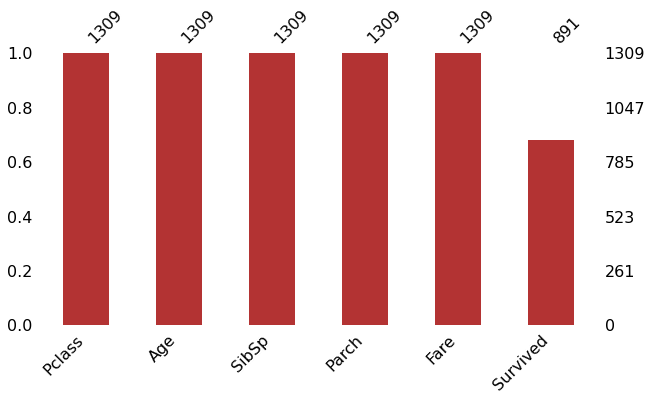

In [ ]:
import missingno as msno 
msno.bar(data_num, figsize=(10,5), color=(0.7, 0.2, 0.2))
plt.show()

In [ ]:
# 학습용 데이터와 검증용 데이터 셋으로 구분

selected_features = ['Pclass','Age','SibSp','Parch','Fare']

X_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

X_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print('Train 데이터 셋 크기 : ', X_train.shape, y_train.shape)
print('Test 데이터 셋 크기 : ', X_test.shape)

Train 데이터 셋 크기 :  (891, 5) (891,)
Test 데이터 셋 크기 :  (418, 5)


In [ ]:
# 훈련용과 검증용 80% : 20% 으로 분리

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size=0.2,
                                            shuffle=True,
                                            random_state=20)

In [ ]:
print(X_tr, X_val, y_tr, y_val)

     Pclass        Age  SibSp  Parch     Fare
811       3  39.000000      0      0  24.1500
29        3  29.881138      0      0   7.8958
49        3  18.000000      1      0  17.8000
105       3  28.000000      0      0   7.8958
616       3  34.000000      1      1  14.4000
..      ...        ...    ...    ...      ...
218       1  32.000000      0      0  76.2917
223       3  29.881138      0      0   7.8958
271       3  25.000000      0      0   0.0000
474       3  22.000000      0      0   9.8375
355       3  28.000000      0      0   9.5000

[712 rows x 5 columns]      Pclass        Age  SibSp  Parch     Fare
347       3  29.881138      1      0  16.1000
674       2  29.881138      0      0   0.0000
791       2  16.000000      0      0  26.0000
836       3  21.000000      0      0   8.6625
56        2  21.000000      0      0  10.5000
..      ...        ...    ...    ...      ...
694       1  60.000000      0      0  26.5500
428       3  29.881138      0      0   7.7500
431       

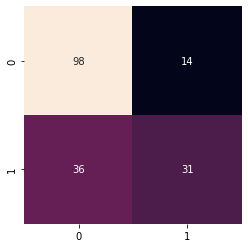

In [ ]:
# 로지스틱 회귀 모델

from sklearn.linear_model import LogisticRegression

# 학습
lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)

# 검증 (예측)
y_val_pred = lr_model.predict(X_val)

# 비교

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()
# 혼동 행렬

# 예측값
          # 실제값


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_pred)

0.7206703910614525

In [ ]:
y_test_pred = lr_model.predict(X_test)

In [ ]:
submission['Survived'] = y_test_pred.astype(int)

submission.to_csv('austin001.csv', index=False)
